In [ ]:
%%file ./.jupyter/custom/custom.css
.left {
    width: 49%;
    float: left;
}

.right {
    width: 49%;
    float: right;
}

h1 {
    text-align: center;
}

h2 {
    text-align: center;
}

# Coordinates in SunPy

## Stuart Mumford


<a href="http://shef.ac.uk">
<img style='float: left; width: 30%; margin-top: 90px; height: 25%;' src='images/TUOS_Logo_CMYK_Keyline.svg'/>
</a>
<a href="https://aperiosoftware.com">
<img style='float: right; width: 30%; margin-top: 90px; height: 25%;' src='images/aperio_logo.svg'/>
</a>
<a href="http://sunpy.org">
<img style='float: right; width: 30%; margin-top: 90px; height: 25%; margin-right: 5%;' src='images/sunpy_logo.svg'/></a>

# In Development

The first version of SunPy Coordinates was released in 0.7.

This presentation also contains "phase 2" which should be included in SunPy 0.8. 

See PR [#1975](https://github.com/sunpy/sunpy/pull/1975)

# Pretty Pictures

![limb](./images/stereo_limb.svg)

# Types of Coordinates

### Pixel Coordinates

* The indexes of your array
* WCS - World Coordinate System
    * Converts pixel coordinates to physical coordinates.
    * A common convention is FITS-WCS.

### Physical Coordinates

* Represents a point in physical space.
* Has some *"Reference System"*
    * An Origin
    * Some reference points to align the frame with respect to other things.
* Can be "projected" when spherical meaning $r\rightarrow \infty$.

# Physical Coordinate Frames

Defined in Thompson (2006):

* Helioprojective (Cartesian)
* Helioprojective (Radial) *
* Heliocentric
* Heliographic (Stonyhurst)
* Heliographic (Carrington)

<p style="font-size: small">
* Not in SunPy
<br/>
<br/>
1. Thompson, W. T. Coordinate systems for solar image data. Astronomy and Astrophysics 449, 791–803 (2006).
</p>

### Helioprojective Cartesian is not Cartesian
<div style="float:left; width:39%">
<p style="padding-top: 2em">
It's spherical.
</p>
</div>
<div style="float:left; width:59%">
<img src="images/coord_inset.png" width=100% />
</div>

# Transformations

<img width=200% src="images/sunpy_coordinates.svg"/>

# Physical Coordinates in SunPy

In [1]:
import astropy.units as u

from astropy.coordinates import SkyCoord
import sunpy.coordinates

In [2]:
sc = SkyCoord(100*u.arcsec, 0.1*u.deg, frame='helioprojective')
sc

<SkyCoord (Helioprojective: dateobs=None, rsun=695508.0 km, observer=<HeliographicStonyhurst Coordinate (dateobs=None): (lon, lat, radius) in (deg, deg, AU)
    ( 0.,  0.,  1.)>): (Tx, Ty) in arcsec
    ( 100.,  360.)>

In [4]:
sc.observer

<HeliographicStonyhurst Coordinate (dateobs=None): (lon, lat, radius) in (deg, deg, AU)
    ( 0.,  0.,  1.)>

# Transformations

## Helioprojective to Heliographic

In [5]:
sc = SkyCoord(100*u.arcsec, 0.1*u.deg, frame='helioprojective')
sc

<SkyCoord (Helioprojective: dateobs=None, rsun=695508.0 km, observer=<HeliographicStonyhurst Coordinate (dateobs=None): (lon, lat, radius) in (deg, deg, AU)
    ( 0.,  0.,  1.)>): (Tx, Ty) in arcsec
    ( 100.,  360.)>

In [6]:
sc.transform_to("heliographic_stonyhurst")

<SkyCoord (HeliographicStonyhurst: dateobs=None): (lon, lat, radius) in (deg, deg, km)
    ( 6.42759277,  21.94999839,  695507.99999766)>

## Off-Disk

In [7]:
sc = SkyCoord(100*u.arcsec, 1500*u.arcsec, frame='helioprojective')
sc

<SkyCoord (Helioprojective: dateobs=None, rsun=695508.0 km, observer=<HeliographicStonyhurst Coordinate (dateobs=None): (lon, lat, radius) in (deg, deg, AU)
    ( 0.,  0.,  1.)>): (Tx, Ty) in arcsec
    ( 100.,  1500.)>

In [8]:
sc.transform_to("heliographic_stonyhurst")

/opt/miniconda/envs/RISE/lib/python3.5/site-packages/sunpy/coordinates/frames.py:353: RuntimeWarning: invalid value encountered in sqrt
  d = ((-1*b) - np.sqrt(b**2 - 4*c)) / 2


<SkyCoord (HeliographicStonyhurst: dateobs=None): (lon, lat, radius) in (deg, deg, km)
    ( nan,  nan,  nan)>

## Calculating Distance

In [6]:
sc = SkyCoord(100*u.arcsec, 900*u.arcsec, frame='helioprojective')
sc

<SkyCoord (Helioprojective: dateobs=None, rsun=695508.0 km, observer=<HeliographicStonyhurst Coordinate (dateobs=None): (lon, lat, radius) in (deg, deg, AU)
    ( 0.,  0.,  1.)>): (Tx, Ty) in arcsec
    ( 100.,  900.)>

In [7]:
sc.frame.calculate_distance()

<Helioprojective Coordinate (dateobs=None, rsun=695508.0 km, observer=<HeliographicStonyhurst Coordinate (dateobs=None): (lon, lat, radius) in (deg, deg, AU)
    ( 0.,  0.,  1.)>): (Tx, Ty, distance) in (arcsec, arcsec, km)
    ( 100.,  900.,   1.49367520e+08)>

# World Coordinate System in SunPy

WCS is built into SunPy Map:

In [8]:
import sunpy.map
from sunpy.data.sample import AIA_171_ROLL_IMAGE

In [9]:
aia = sunpy.map.Map(AIA_171_ROLL_IMAGE) 

In [13]:
sc = aia.pixel_to_data(100*u.pixel, 100*u.pixel)
sc

<SkyCoord (Helioprojective: dateobs=2014-04-09 06:00:12.970000, rsun=695508.0 km, observer=<HeliographicStonyhurst Coordinate (dateobs=None): (lon, lat, radius) in (deg, deg, m)
    ( 0., -6.047074,   1.49860274e+11)>): (Tx, Ty) in arcsec
    (-1652.90620495,  1.80900012)>

In [14]:
sc.transform_to("heliographic_carrington")

/opt/miniconda/envs/RISE/lib/python3.5/site-packages/sunpy/coordinates/frames.py:353: RuntimeWarning: invalid value encountered in sqrt
  d = ((-1*b) - np.sqrt(b**2 - 4*c)) / 2


<SkyCoord (HeliographicCarrington: dateobs=2014-04-09 06:00:12.970000): (lon, lat, radius) in (deg, deg, km)
    ( nan,  nan,  nan)>

In [11]:
aia.data_to_pixel(sc)

PixelPair(x=<Quantity 99.99999999980423 pix>, y=<Quantity 99.99999999990769 pix>)

# Plotting Coordinates

This is where it get's fun.

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


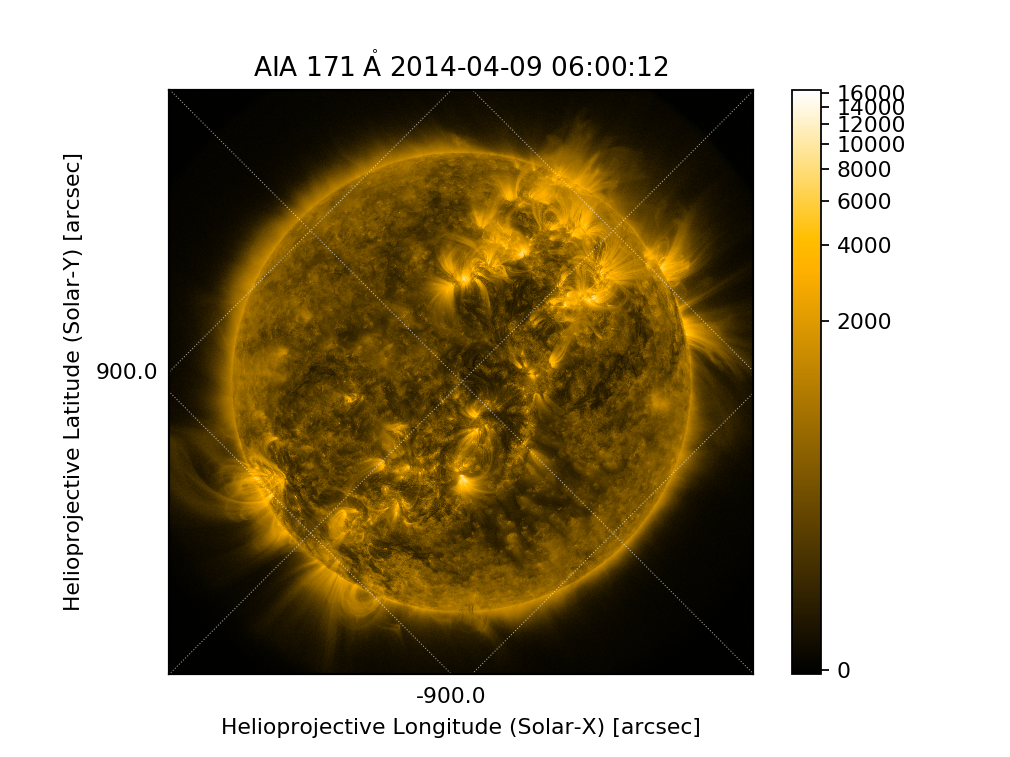

In [16]:
aia.peek()

# Overlays

<IPython.core.display.Javascript object>


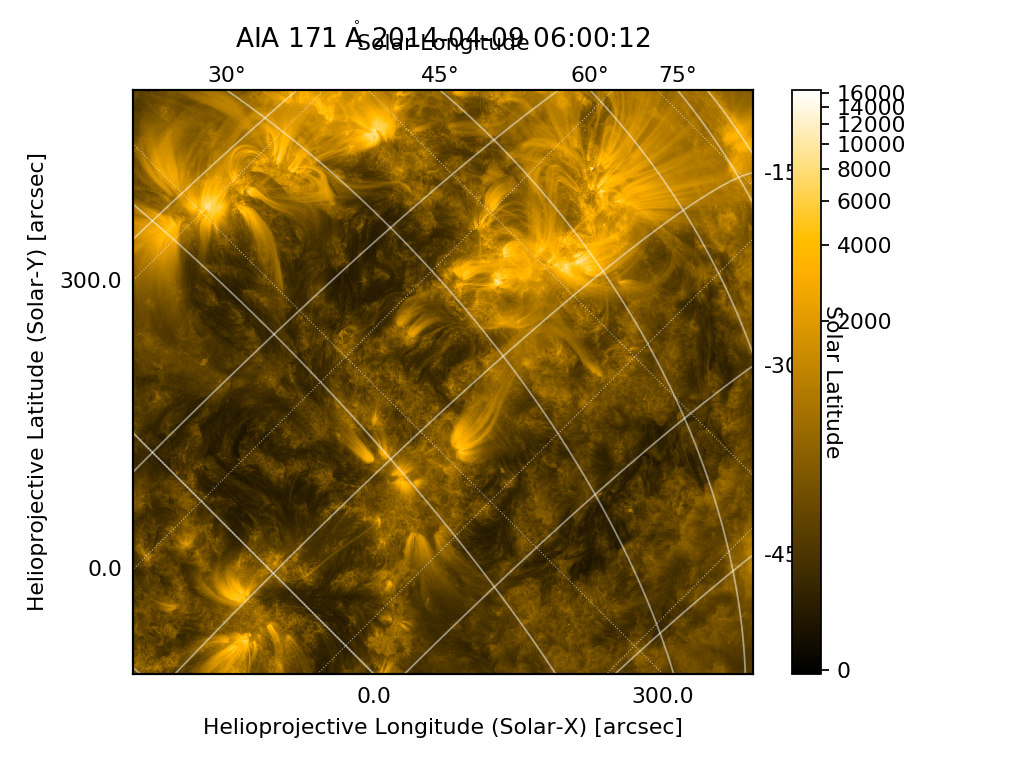

In [17]:
aia.peek(draw_grid=True)

## More Overlays

In [18]:
aia, euvi = sunpy.map.Map('/home/stuart/sunpy/data/aia_lev1_304a_2011_01_01t00_00_08_12z_image_lev1.22.fits',
                          '/home/stuart/sunpy/data/20110101_000615_n4eub.22.fts')

<IPython.core.display.Javascript object>


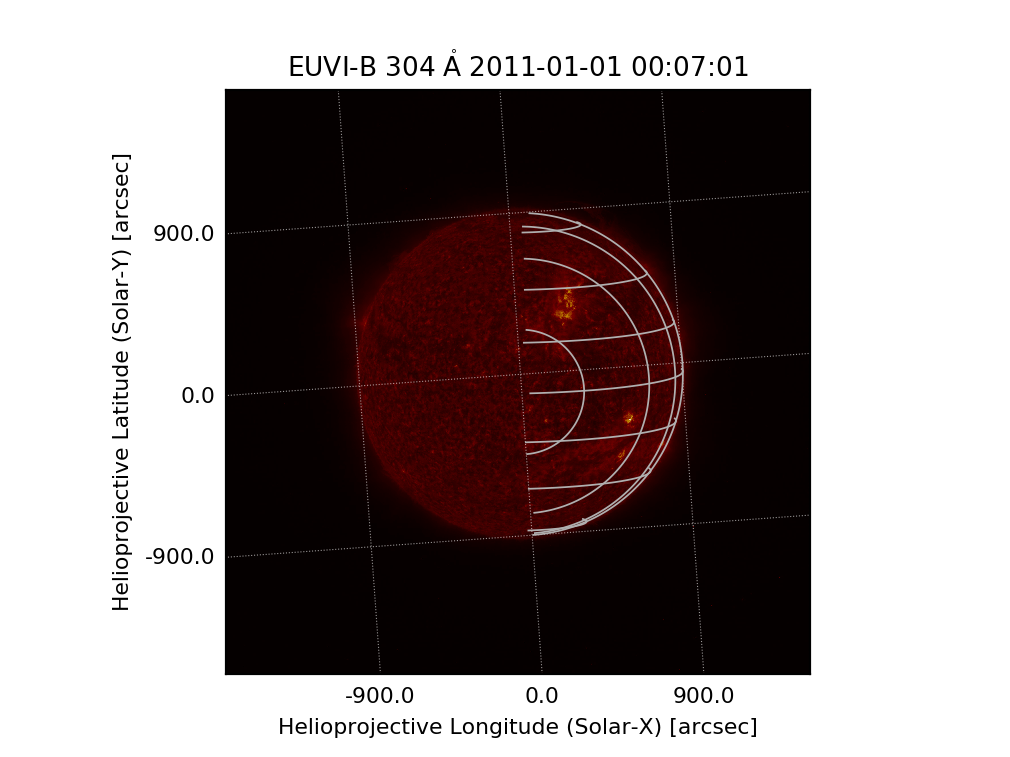

In [19]:
fig = plt.figure()
ax = plt.subplot(projection=euvi)
euvi.plot()

overlay = ax.get_coords_overlay(aia.coordinate_frame)
overlay.grid()


<IPython.core.display.Javascript object>


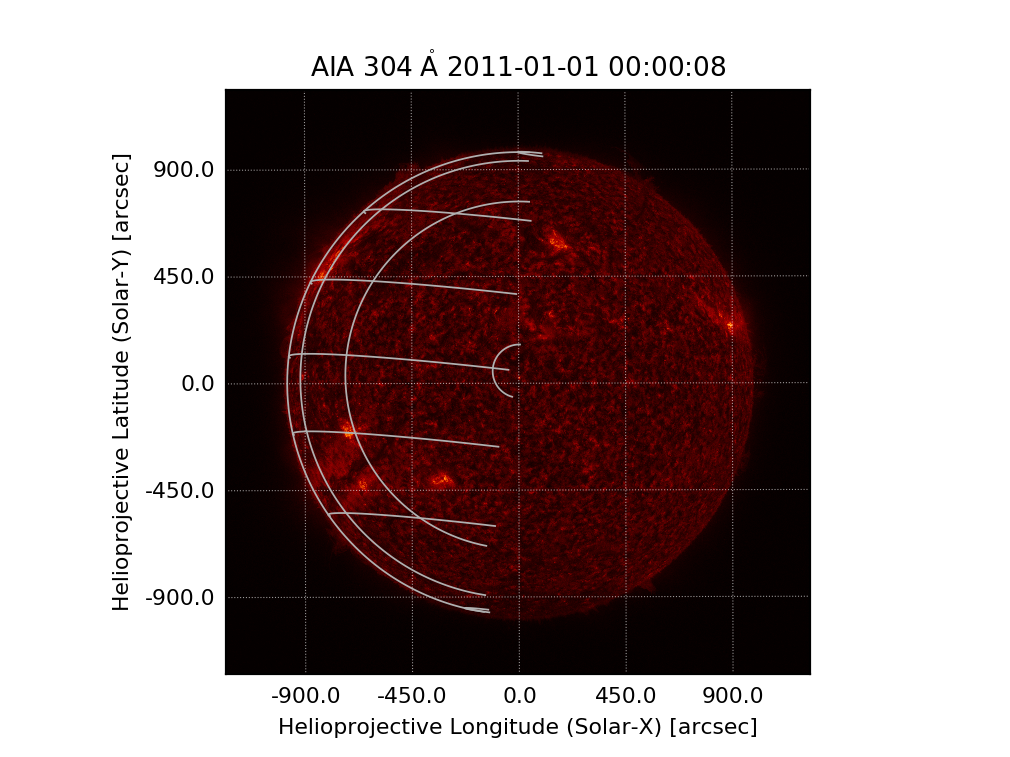

In [20]:
fig = plt.figure()
ax = plt.subplot(projection=aia)
aia.plot()

overlay = ax.get_coords_overlay(euvi.coordinate_frame)
overlay.grid()

# Heliographic Maps

In [21]:
import numpy as np

In [22]:
syn_map = sunpy.map.Map("/home/stuart/SyncBox/Programming/SunPy/hmi.Mldailysynframe_720s_nrt.fits")

# Make it standard compliant:
syn_map.meta['CUNIT2'] = 'degree'
syn_map.meta['CDELT2'] = 180/np.pi * syn_map.meta['CDELT2']

# Set the colorbar properties;
syn_map.plot_settings['cmap'] = 'hmimag'
syn_map.plot_settings['norm'] = plt.Normalize(-1500, 1500)

print(syn_map.coordinate_system)

SpatialPair(axis1='CRLN-CEA', axis2='CRLT-CEA')


/opt/miniconda/envs/RISE/lib/python3.5/site-packages/sunpy/map/mapbase.py:746: Warning: Unknown value for CUNIT2
  Warning)


<IPython.core.display.Javascript object>


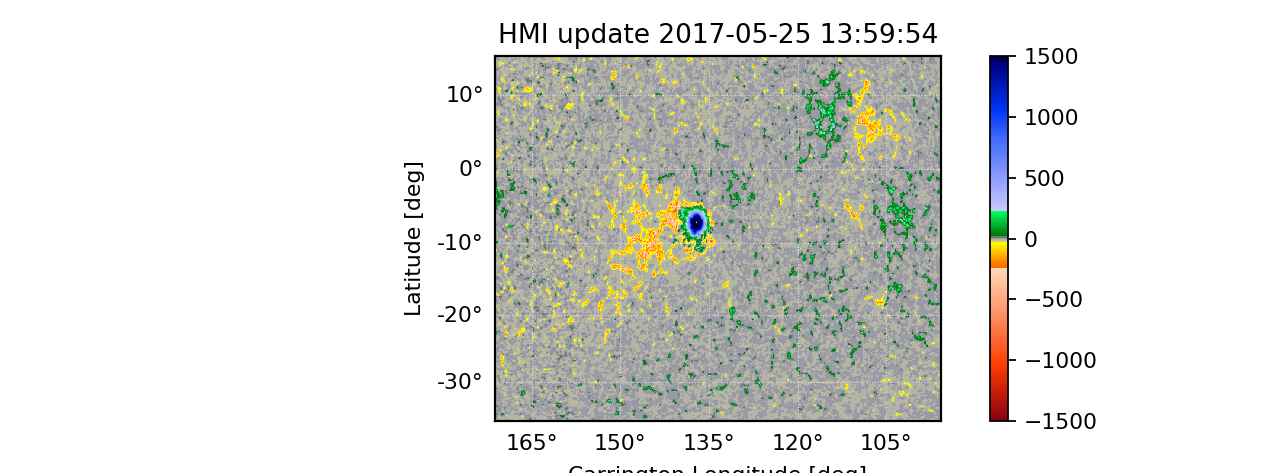

In [23]:
fig = plt.figure(figsize=(8, 3))
syn_map.plot()
plt.colorbar()

l = plt.ylim((1, syn_map.data.shape[0]-1))

# Thanks!